In [1]:
from sklearn.linear_model import LassoCV,Lasso,RidgeCV,Ridge,ElasticNetCV,ElasticNet
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
def mod_ada_lasso(X_train,y_train,X_test):
    
    # apply ridge regression to determine the penalty weights
    rcv = RidgeCV()
    rcv.fit(X_train,y_train)
    ridge_coefs = rcv.coef_
    
    # apply lasso with penalization
    enet = ElasticNet(l1_ratio=1/abs(min(ridge_coefs)))
    enet.fit(X_train,y_train)
    impute_values = enet.predict(X_test)

    return impute_values

In [3]:
def mod_elastic_net(X_train,y_train,X_test):
    enet = ElasticNet(alpha=0.5)
    enet.fit(X_train,y_train)
    
    impute_values = enet.predict(X_test)
    
    return impute_values

In [4]:
def mod_scad(X_train,y_train,X_test):
    enet = ElasticNet(l1_ratio=3.7) # SCAD penalty default value
    enet.fit(X_train,y_train)
    impute_values = enet.predict(X_test)
    
    return impute_values

In [5]:
X = pd.read_excel('./clean_pls_predictors.xlsx')

### Feature Engineering using Lasso

In [6]:
def feature_engineering_lasso(X,target_column,display=True):
    input_X = X.iloc[:,8:]
    output_Y = X[[target_column]]
    features = []
    f_dict = {}
    
    model = Lasso(alpha=1)
    model.fit(input_X,output_Y)
    
    for i,j in zip(input_X.keys(),model.coef_):
        if j != 0:
            features.append(i)
            f_dict.update({i:j})

    f_df = pd.DataFrame({'features':list(f_dict.keys()),'coef_':list(f_dict.values())})
    f_df.sort_values(by='coef_',ascending=False,ignore_index=True,inplace=True)

    if display:
        plt.figure(figsize=(20,5))
        sns.barplot(f_df.features,f_df.coef_)
        plt.xticks(rotation=90)
        plt.show()
    
    return list(f_df.features)

In [9]:
output_columns = list(X.iloc[:,0:8].keys())
output_columns

['glucan',
 'xylan',
 'lignin',
 'ash',
 'Volatiles  db',
 'Ash  db',
 'Carbon  db',
 'Nitrogen  db']

In [16]:
new_X = X.dropna()

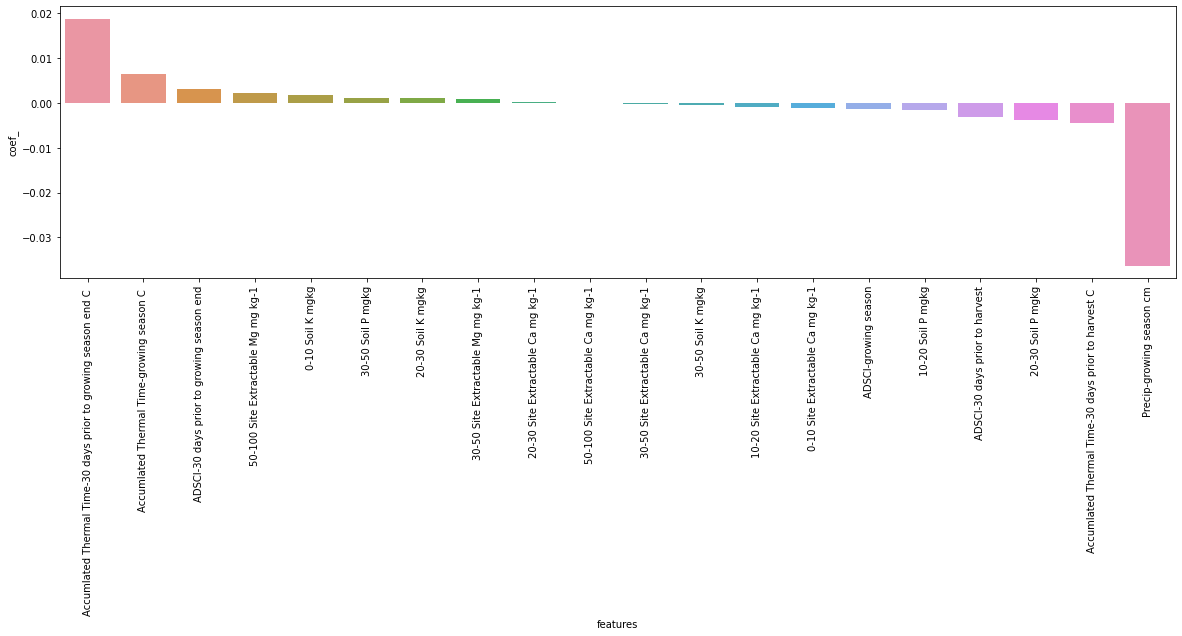

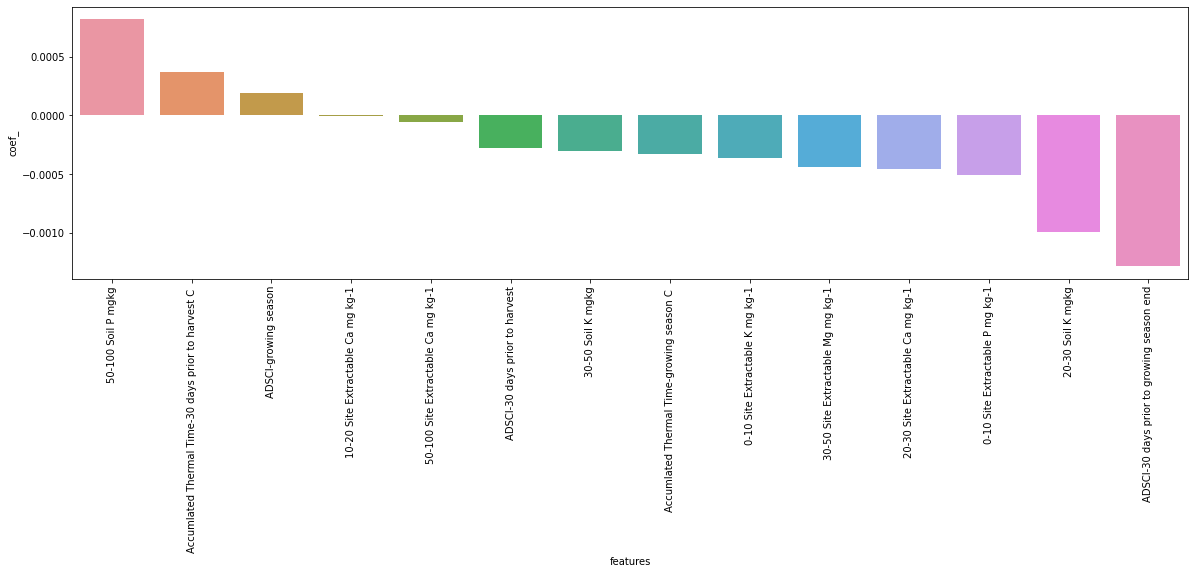

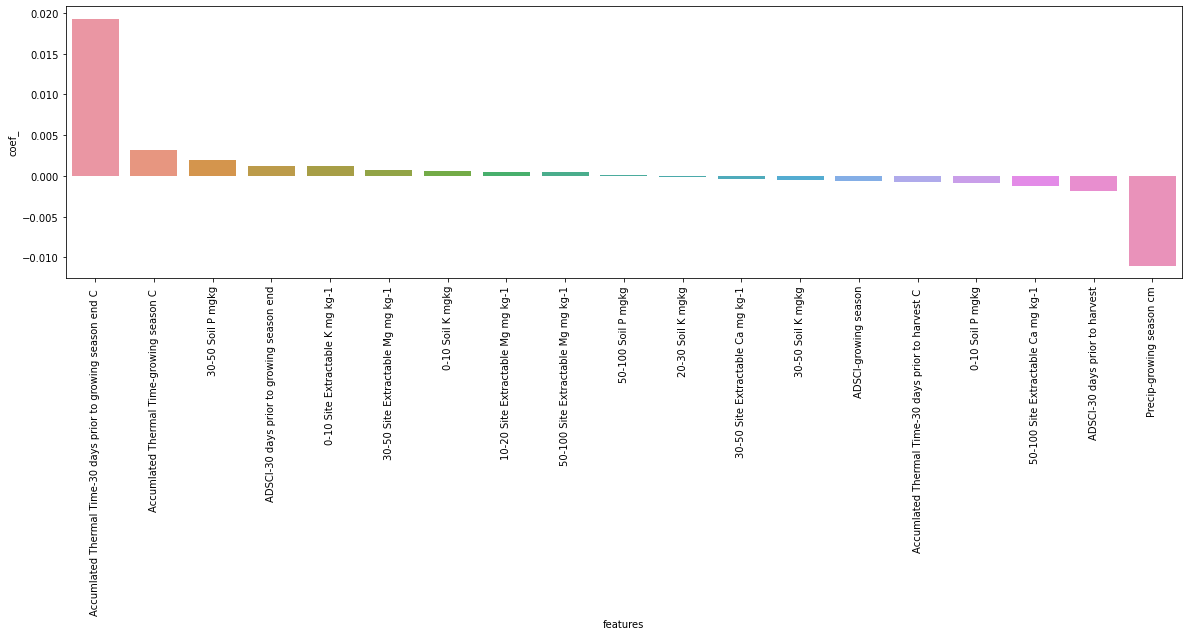

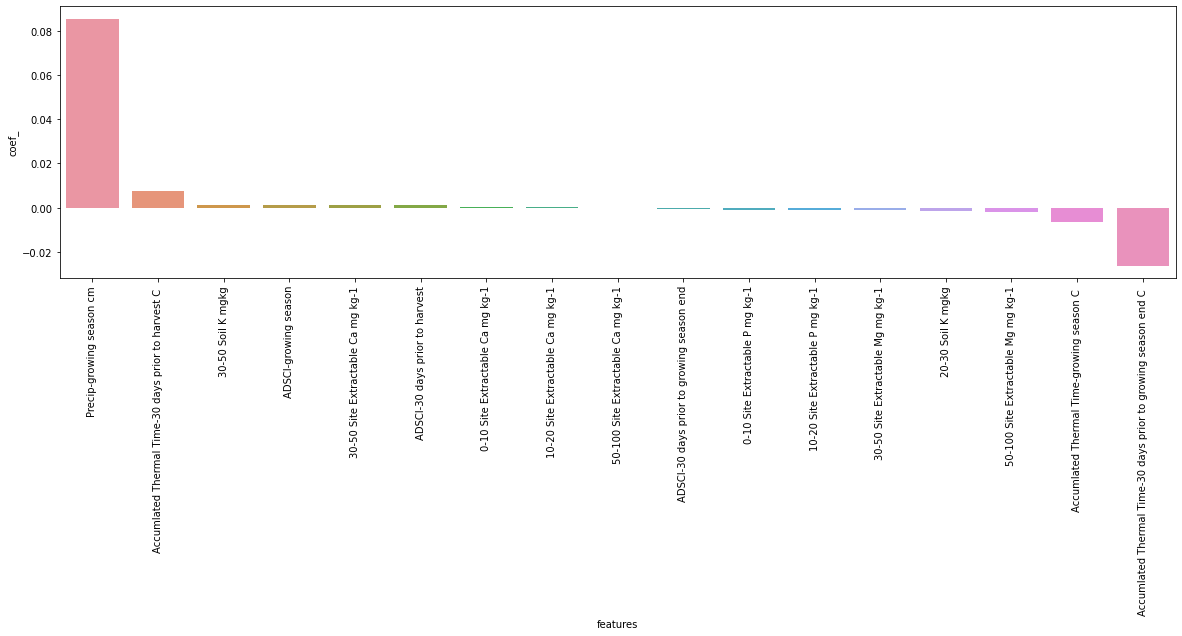

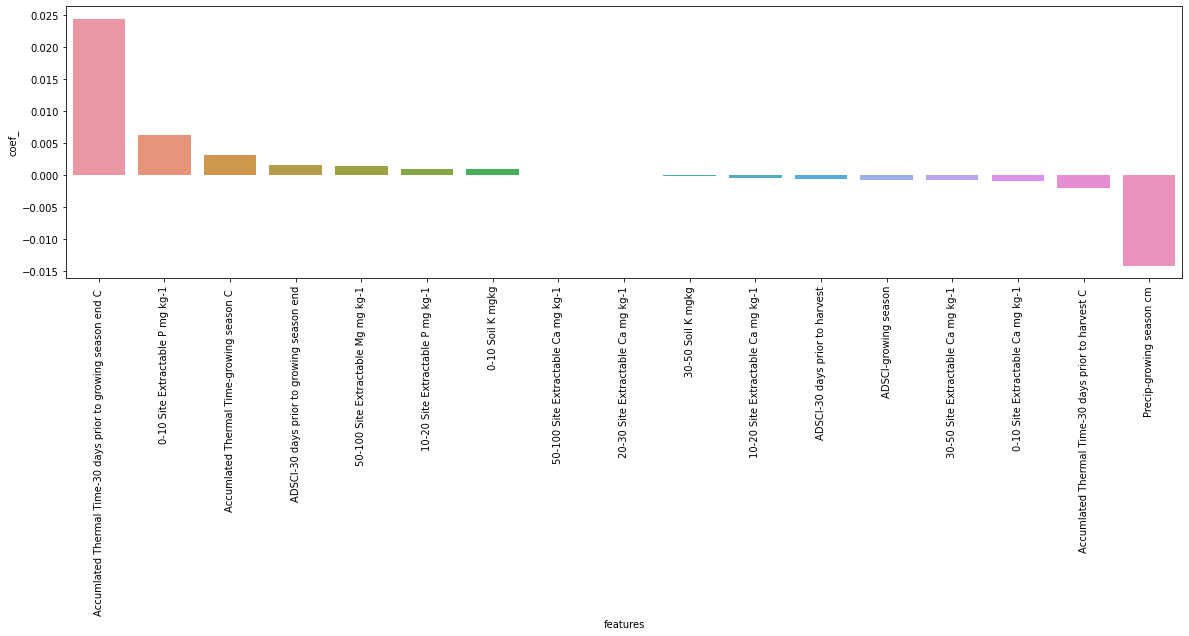

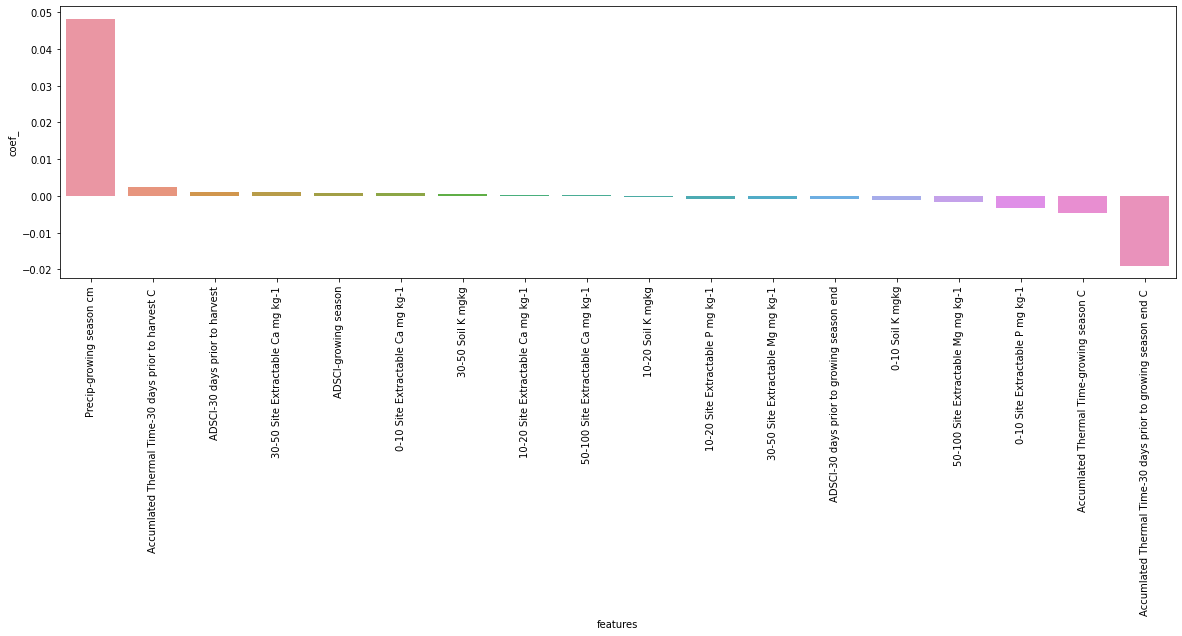

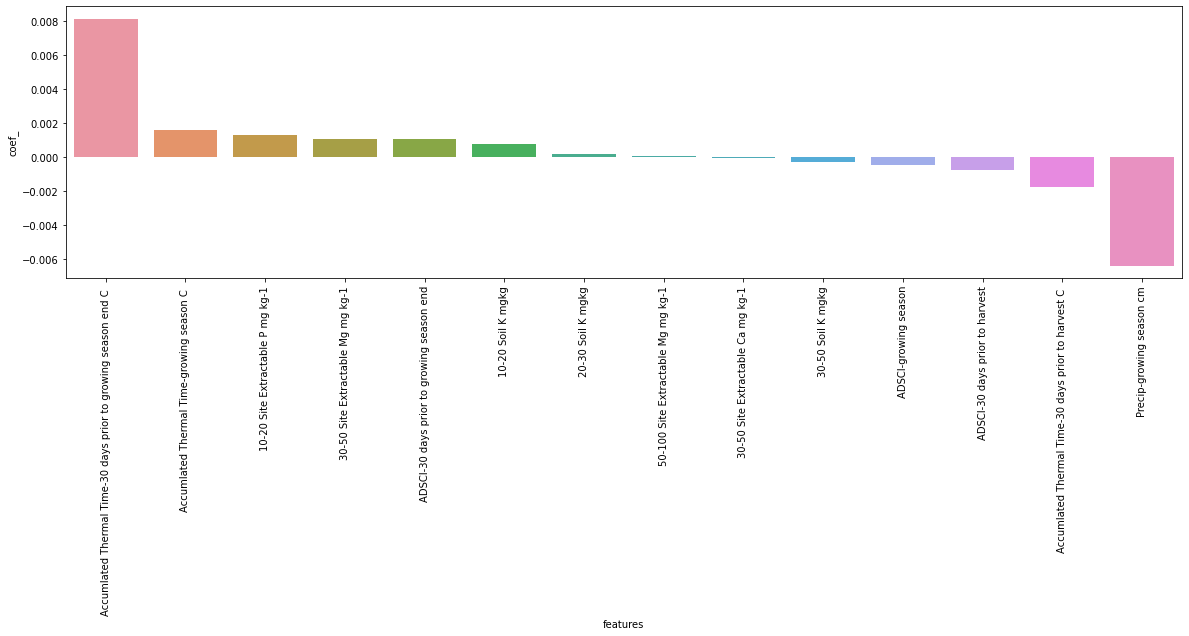

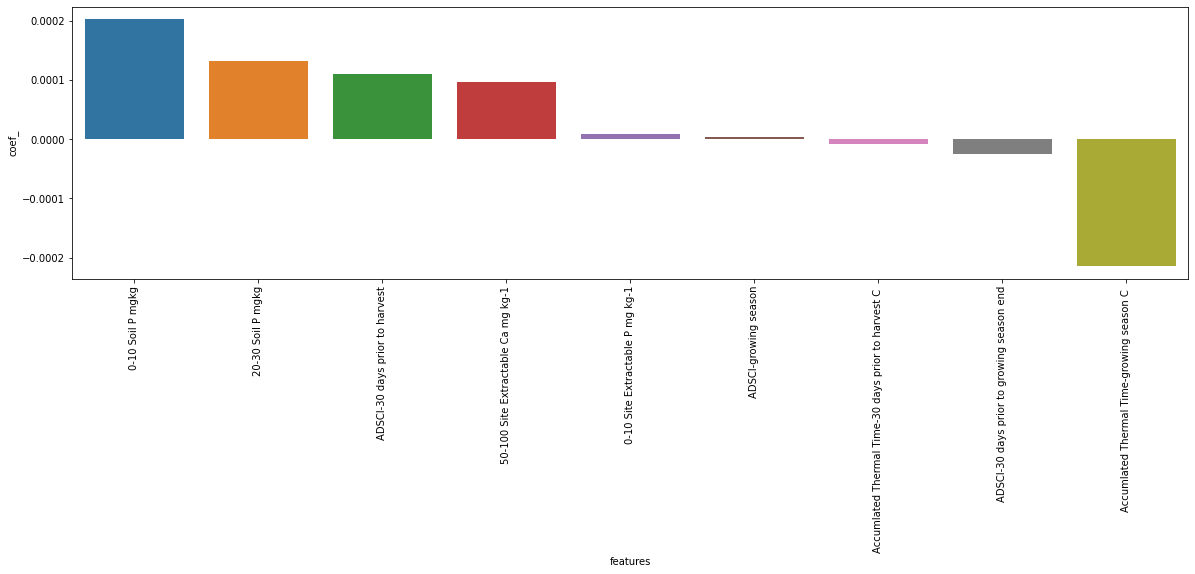

In [18]:
best_features = {}
for opt in output_columns:
    features_list = feature_engineering_lasso(new_X,target_column=opt,display=True)
    for fe in features_list:
        if fe not in best_features.keys():
            best_features.update({fe:1})
            
        else:
            best_features[fe] += 1

In [22]:
best_features_df = pd.DataFrame({'features':best_features.keys(),'counts':best_features.values()})

In [24]:
best_features_df.sort_values(by='counts',ascending=False,ignore_index=True,inplace=True)

In [29]:
best_features_df

,features,counts
0,ADSCI-30 days prior to harvest,8
1,ADSCI-30 days prior to growing season end,8
2,Accumlated Thermal Time-growing season C,8
3,ADSCI-growing season,8
4,Accumlated Thermal Time-30 days prior to harve...,8
5,50-100 Site Extractable Ca mg kg-1,7
6,30-50 Soil K mgkg,7
7,Accumlated Thermal Time-30 days prior to growi...,6
8,50-100 Site Extractable Mg mg kg-1,6
9,30-50 Site Extractable Mg mg kg-1,6


In [32]:
X = X[output_columns + list(best_features_df['features'])]
X.head()

,glucan,xylan,lignin,ash,Volatiles db,Ash db,Carbon db,Nitrogen db,ADSCI-30 days prior to harvest,ADSCI-30 days prior to growing season end,...,0-10 Soil K mgkg,20-30 Site Extractable Ca mg kg-1,20-30 Soil P mgkg,50-100 Soil P mgkg,0-10 Site Extractable K mg kg-1,30-50 Soil P mgkg,0-10 Soil P mgkg,10-20 Soil K mgkg,10-20 Soil P mgkg,10-20 Site Extractable Mg mg kg-1
0,36.193500,21.764114,19.238295,6.586029,81.223333,5.776667,47.813333,0.393333,0.0,0.0,...,94.333,1722,26.000,1.0,144,4.667,31.000,131.667,37.333,177
1,40.410339,22.226731,21.094115,3.712055,82.440000,3.943333,48.763333,0.156667,0.0,0.0,...,122.000,1390,7.667,1.0,130,2.000,26.000,161.333,35.667,325
2,39.695928,23.143717,20.650154,4.466301,81.620000,4.520000,48.135000,0.190000,0.0,0.0,...,128.333,1722,7.333,1.0,144,2.000,23.333,98.667,11.667,177
3,40.460079,22.638064,21.074753,3.384731,82.223333,3.870000,48.436667,0.055000,0.0,0.0,...,109.333,1613,49.667,1.0,75,11.333,41.667,161.333,54.333,154
4,37.111353,22.119233,19.983931,6.010077,81.713333,5.093333,48.053333,0.280000,0.0,0.0,...,155.667,1390,23.667,1.0,130,5.333,46.000,109.667,34.333,325


# Mouse Class

In [33]:
class mouse:
    
    def __init__(self,X,prediciton_algorithm,max_iterations,stopping_criterion):
        self.X = X
        self.prediciton_algorithm = prediciton_algorithm
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.X_mean = None
        self.X_sd = None
        self.y_mean = None
        self.y_sd = None
        self.current_column_name = None
        self.current_column_index = None
        self.max_iterations=max_iterations
        self.stopping_criterion = stopping_criterion
        self.iterations_performed = None,
        
        temp_X = np.array(self.X)
        self.n = self.X.shape[0]
        self.p = self.X.shape[1]
        
        temp_missing_data = {}
    
        for col in range(temp_X.shape[1]):
            NAs_found = np.where(np.isnan(temp_X[:,col])==True)[0].tolist()
            if len(NAs_found) != 0:
                current_mean = np.delete(temp_X[:,col],NAs_found).mean()
                temp_list = {i:current_mean for i in NAs_found}
                temp_X[NAs_found,col] = current_mean
                temp_missing_data.update({str(col):temp_list})
                
        self.X = temp_X
        self.q = len(temp_missing_data)
        self.missing_data = temp_missing_data
        self.X_old = temp_X*100
        
        
# Set_column_response function used for checking datatype and assing the value based on the datatype
        
    def set_column_response(self,input_index):
        if type(input_index) == int:
            self.current_column_name = str(input_index) 
            self.current_column_index = input_index
            
        else:
            self.current_column_name = input_index
            self.current_column_index = int(input_index)
        
            
    
# Dividing the data into training,test and finding mean and standard deviation
    def set_data_split(self):
        
        row_missing_index = self.missing_data[self.current_column_name].keys()
                
        ### X train ###
        temp_X_train = np.delete(self.X,self.current_column_index,axis=1)
        temp_X_train = np.delete(temp_X_train,list(row_missing_index),axis=0)

        ### X test ###
        temp_X_test = np.delete(self.X,self.current_column_index,axis=1)
        temp_X_test = temp_X_test[list(row_missing_index),:]
        
        ### Y_train ###
        temp_Y_train = np.delete(self.X,list(row_missing_index),axis=0)
        temp_Y_train = temp_Y_train[:,self.current_column_index]

        ### Y_test ###
        temp_Y_test = self.X[list(row_missing_index),self.current_column_index]
        
        # center the data to the training set
        # this will change with each iteration of imputation
        self.X_mean = temp_X_train.mean()
        self.X_sd = temp_X_train.std()

        self.y_mean = temp_Y_train.mean()
        self.y_sd = temp_Y_train.std()

        self.y_train = (temp_Y_train - self.y_mean) / self.y_sd # -3 to + 3
        self.y_test = (temp_Y_test - self.y_mean) / self.y_sd # -3 to + 3

        temp_X_train = temp_X_train - self.X_mean
        tem_X_test = temp_X_test - self.X_mean
        
        self.X_train = temp_X_train/self.X_sd # -3 to + 3
        self.X_test = temp_X_test/self.X_sd # -3 to + 3
        
    
    def update_X(self):
        
        row_missing_index =  self.missing_data[self.current_column_name].keys()
        
        for i,j in zip(row_missing_index,self.y_test):
            self.missing_data[self.current_column_name][i] = (j*self.y_sd) + self.y_mean
            
        self.X[list(self.missing_data[self.current_column_name].keys()),self.current_column_index] = self.y_test
      
    
# Update_X function updates the X matrix missing data wth y_pred.
    
    def run(self):
        
        for iters in range(self.max_iterations):
            self.iterations_performed = iters
            # 2. Regressing the missing values
            # random starting point for the missing data column
            
            for k in self.missing_data.keys():
                
                self.set_column_response(k)
                self.set_data_split()
                self.y_test = self.prediciton_algorithm(self.X_train,self.y_train,self.X_test) # 4th - Shape of X_test - (7,115)
                self.update_X()
                
            if np.linalg.norm(self.X - self.X_old) < self.stopping_criterion:
                
                break
                
            else:
                self.X_old = self.X
            
        return self.missing_data

In [34]:
mouse_class = mouse(X,prediciton_algorithm=mod_ada_lasso,
                    max_iterations=30,
                    stopping_criterion=1e-5)
mouse_class.run()

{'4': {195: 83.26533959305165,
  199: 83.26533959305165,
  200: 83.26533959305165,
  206: 83.26533959305165,
  212: 83.26533959305165,
  213: 83.26533959305165,
  214: 83.26533959305165},
 '5': {195: 2.3232633758325685,
  199: 2.3232633758325685,
  200: 2.3232633758325685,
  206: 2.282372214058862,
  212: 2.266463964420744,
  213: 2.266463964420744,
  214: 2.266463964420744},
 '6': {195: 49.08800938967136,
  199: 49.08800938967136,
  200: 49.08800938967136,
  206: 49.08800938967136,
  212: 49.08800938967136,
  213: 49.08800938967136,
  214: 49.08800938967136},
 '7': {195: 0.3068594284409085,
  199: 0.3068594284409085,
  200: 0.3068594284409085,
  206: 0.3068594284409085,
  212: 0.3068594284409085,
  213: 0.3068594284409085,
  214: 0.3068594284409085}}

# Mice Class

In [35]:
class mice:
    
    def __init__(self,X,prediction_algorithm):
        
        self.X = X
        self.prediction_algorithm = prediction_algorithm
        self.num_replicates = 10
        self.max_iterations = 30
        self.stopping_criterion = 1e-5
        self.list_of_replicates = {}
        self.imputation_results = {}
        self.imputation_metrics = {}
        
    def run(self):
        mouse_class = mouse(X=self.X,prediciton_algorithm=self.prediction_algorithm,
                            max_iterations=self.max_iterations,
                            stopping_criterion=self.stopping_criterion)
        for m in range(self.num_replicates):
            self.list_of_replicates.update({m:mouse_class.run()})
    
    # Double check with this code with Ross
    
    def collect(self):
        
        for i in range(self.num_replicates):
            for j in self.list_of_replicates[i].keys():
                if len(self.imputation_results) == 0:
                    
                    temp_index = list(self.list_of_replicates[i][j].keys())
                    temp_matrix = np.repeat(0,len(temp_index)*self.num_replicates).reshape(self.num_replicates,len(temp_index))
                    temp_matrix = pd.DataFrame(temp_matrix,columns=temp_index)
                    self.imputation_results.update({j:temp_matrix})
                    
                temp_value = self.list_of_replicates[i][j].values()
                self.imputation_results.update({j:{i:temp_value}})
                
    def set_summary_stats(self):
        
        if len(self.imputation_results) == 0:
            self.collect()
            
        for j in self.imputation_results:
            temp_result = {}
            num_samples = len(self.imputation_results[j])
            temp_result['mean'] = np.mean(list(list(self.imputation_results[j].values())[0])[0])
            temp_result['sd'] = np.std(list(list(self.imputation_results[j].values())[0])[0])
            
            standard_error = 1.96*temp_result['sd']/np.sqrt(num_samples)
            temp_result['upper_ci'] = temp_result['mean'] + standard_error
            temp_result['lower_ci'] = temp_result['mean'] - standard_error
            
            self.imputation_metrics.update({j:temp_result})
            
        print(self.imputation_metrics)
                     

In [36]:
mice_class = mice(X,prediction_algorithm=mod_ada_lasso)
mice_class.run()
mice_class.set_summary_stats()

{'4': {'mean': 83.26533959305165, 'sd': 0.0, 'upper_ci': 83.26533959305165, 'lower_ci': 83.26533959305165}, '5': {'mean': 2.3232633758325685, 'sd': 0.0, 'upper_ci': 2.3232633758325685, 'lower_ci': 2.3232633758325685}, '6': {'mean': 49.08800938967136, 'sd': 0.0, 'upper_ci': 49.08800938967136, 'lower_ci': 49.08800938967136}, '7': {'mean': 0.3068594284409085, 'sd': 0.0, 'upper_ci': 0.3068594284409085, 'lower_ci': 0.3068594284409085}}
